# 결정 트리(Decision Tree)
결정 트리는 사람이 **스무고개** 하듯이, 질문을 하나씩 던져가며 규칙(if-else)으로 분류하는 모델
- **장점**: 해석이 쉽다(규칙을 읽을 수 있음
- **단점**: 깊어지면 **과적합**에 취약




## 1) 기본 개념 (스무고개 비유 + 불순도)
- “꽃잎 길이가 2.5cm보다 짧나요?” → 네/아니오
- “꽃받침 너비가 3.0cm보다 넓나요?” → 네/아니오
    - 규칙을 따라 내려가서 **잎(leaf)**에서 라벨 결정
- 트리는 불순도(impurity)를 많이 줄이는 분기 기준을 선택
  - 불순도: 한 노드에 라벨이 섞여 있을수록 ↑, 한 라벨만 있으면 0 (깨끗)
  - 지니(Gini), 엔트로피(Entropy) 지표로 불순도를 계산

## 2) Hello Iris


In [20]:
import numpy as np, pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.figure_factory as ff
import graphviz

iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names  = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

dt = DecisionTreeClassifier(max_depth=None, random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        10
  versicolor      0.900     0.900     0.900        10
   virginica      0.900     0.900     0.900        10

    accuracy                          0.933        30
   macro avg      0.933     0.933     0.933        30
weighted avg      0.933     0.933     0.933        30



In [2]:

cm = confusion_matrix(y_test, y_pred)
fig = ff.create_annotated_heatmap(
    z=cm, x=list(target_names), y=list(target_names),
    colorscale="Blues", showscale=True
)
fig.update_layout(title="Confusion Matrix (Decision Tree)",
                  xaxis=dict(title="Predicted"), yaxis=dict(title="Actual"),
                  template="plotly_dark")
fig.show()

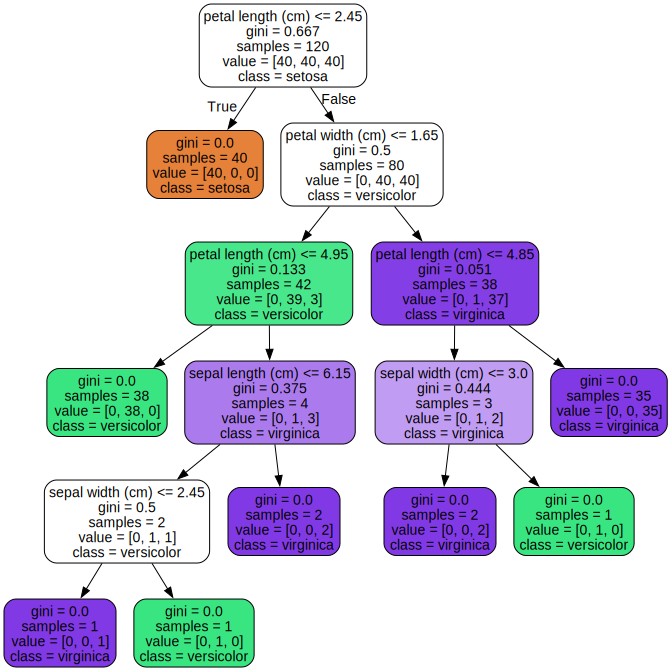

In [17]:
dot = export_graphviz(
    dt,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True,
    impurity=True
)
graphviz.Source(dot)

**Graphviz 노드 읽는 법 요약**
- `feature ≤ value` : 분기 조건(질문)
- `gini` : 불순도 (0이면 한 클래스만)
- `samples` : 해당 노드 샘플 수
- `value` : 클래스별 샘플 수 ([setosa, versicolor, virginica])
- `class` : 이 노드의 최종 예측 클래스

## 2-1) mx_depth

Train Accuracy: 0.6666666666666666
Test  Accuracy: 0.6666666666666666


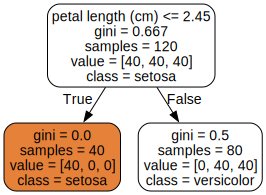

In [31]:
dt_depth3 = DecisionTreeClassifier(max_depth=1, random_state=42)
dt_depth3.fit(X_train, y_train)

print("Train Accuracy:", accuracy_score(y_train, dt_depth3.predict(X_train)))
print("Test  Accuracy:", accuracy_score(y_test, dt_depth3.predict(X_test)))

dot3 = export_graphviz(
    dt_depth3, out_file=None,
    feature_names=feature_names, class_names=target_names,
    filled=True, rounded=True, impurity=True
)
graphviz.Source(dot3)

In [32]:
dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train, y_train)

print("Full Depth Train Accuracy :", accuracy_score(y_train, dt_full.predict(X_train)))
print("Full Depth Test  Accuracy :", accuracy_score(y_test, dt_full.predict(X_test)))
print("Depth=3  Train Accuracy   :", accuracy_score(y_train, dt_depth3.predict(X_train)))
print("Depth=3  Test  Accuracy   :", accuracy_score(y_test,  dt_depth3.predict(X_test)))

Full Depth Train Accuracy : 1.0
Full Depth Test  Accuracy : 0.9333333333333333
Depth=3  Train Accuracy   : 0.6666666666666666
Depth=3  Test  Accuracy   : 0.6666666666666666


## 2-2) min_samples_split / min_samples_leaf — 작은 노드 방지(적당히 쪼개)(가이드 라인)


[depth=4 only]         Train: 0.992 | Test: 0.933
[depth=4 + split/leaf] Train: 0.983 | Test: 0.967


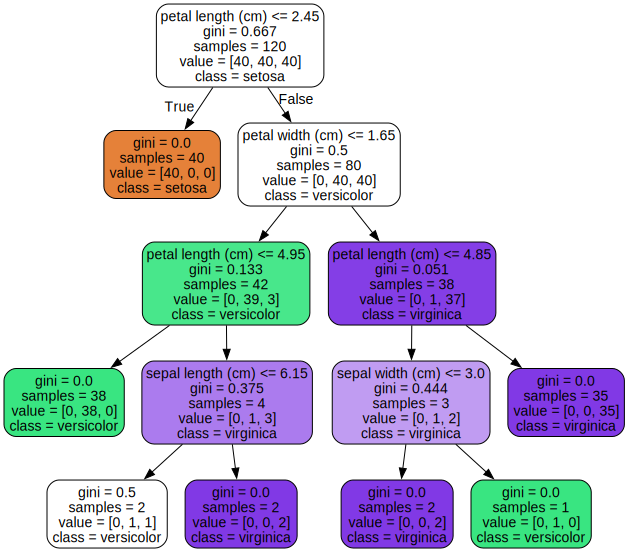

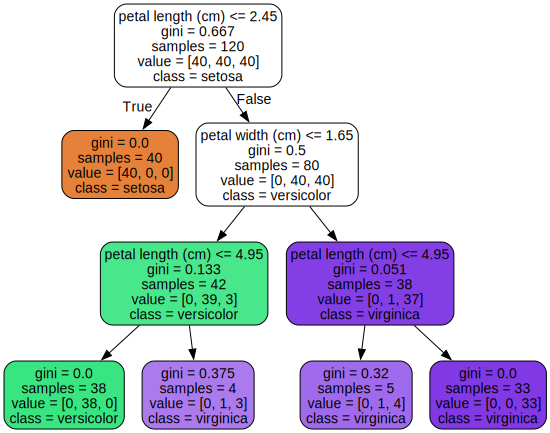

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import export_graphviz

dt_depth4 = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_depth4.fit(X_train, y_train)

dt_leaf = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=8,
    min_samples_leaf=4,
    random_state=42
)
dt_leaf.fit(X_train, y_train)

print(f"[depth=4 only]         Train: {accuracy_score(y_train, dt_depth4.predict(X_train)):.3f} | "
      f"Test: {accuracy_score(y_test, dt_depth4.predict(X_test)):.3f}")
print(f"[depth=4 + split/leaf] Train: {accuracy_score(y_train, dt_leaf.predict(X_train)):.3f} | "
      f"Test: {accuracy_score(y_test, dt_leaf.predict(X_test)):.3f}")

dot_depth4 = export_graphviz(
    dt_depth4, out_file=None,
    feature_names=feature_names, class_names=target_names,
    filled=True, rounded=True, impurity=True
)
dot_leaf = export_graphviz(
    dt_leaf, out_file=None,
    feature_names=feature_names, class_names=target_names,
    filled=True, rounded=True, impurity=True
)

display(graphviz.Source(dot_depth4))
display(graphviz.Source(dot_leaf))

## 2-3) criterion = gini vs entropy — 불순도 기준 비교

In [34]:
dt_gini = DecisionTreeClassifier(max_depth=3, criterion="gini", random_state=42).fit(X_train, y_train)
dt_entropy = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=42).fit(X_train, y_train)

print("Gini  Test Accuracy:", accuracy_score(y_test, dt_gini.predict(X_test)))
print("Entropy Test Accuracy:", accuracy_score(y_test, dt_entropy.predict(X_test)))



Gini  Test Accuracy: 0.9666666666666667
Entropy Test Accuracy: 0.9666666666666667


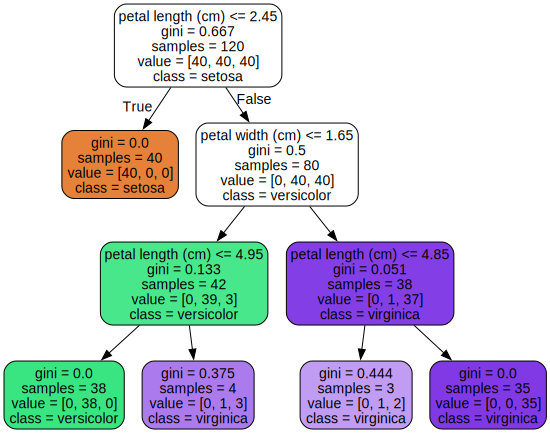

In [35]:
# Gini 트리
dot_gini = export_graphviz(
    dt_gini, out_file=None,
    feature_names=feature_names, class_names=target_names,
    filled=True, rounded=True, impurity=True
)
graphviz.Source(dot_gini)


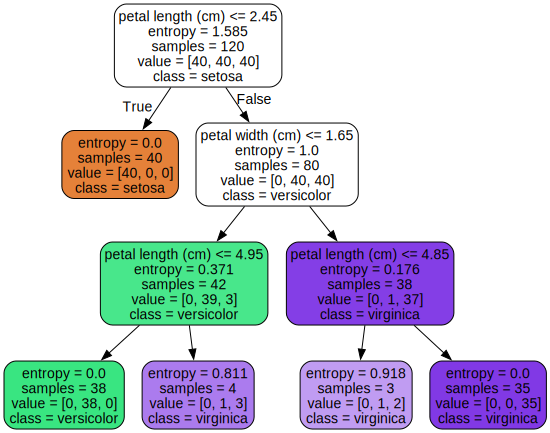

In [9]:
# Entropy 트리 (정보 이득 큰 기준으로 분할)
dot_entropy = export_graphviz(
    dt_entropy, out_file=None,
    feature_names=feature_names, class_names=target_names,
    filled=True, rounded=True, impurity=True
)
graphviz.Source(dot_entropy)

## 3) 주요 하이퍼파라미터 & 깊이별 성능 비교
- `max_depth`: 트리 최대 깊이(너무 크면 과적합)
- `min_samples_split`: 분할에 필요한 최소 샘플 수
- `min_samples_leaf`: 잎노드 최소 샘플 수
- `criterion`: gini/entropy

-> 깊이 제한이 없으면 학습 데이터에 달라붙어 과적합합니다.

In [36]:
from sklearn.metrics import accuracy_score

depth_list = [None, 2, 3, 4, 5, 8, 12]
rows = []
for depth in depth_list:
    m = DecisionTreeClassifier(max_depth=depth, random_state=42)
    m.fit(X_train, y_train)
    rows.append((depth,
                 accuracy_score(y_train, m.predict(X_train)),
                 accuracy_score(y_test,  m.predict(X_test))))
pd.DataFrame(rows, columns=["max_depth","train_acc","test_acc"])

,max_depth,train_acc,test_acc
0,NaN,1.000000,0.933333
1,2.0,0.966667,0.933333
2,3.0,0.983333,0.966667
3,4.0,0.991667,0.933333
4,5.0,1.000000,0.933333
5,8.0,1.000000,0.933333
6,12.0,1.000000,0.933333


해석
- `max_depth=None`: train=1.000, test↓ → **과적합** 경향, 규칙이 매우 복잡
- `max_depth=3`: 규칙이 단순해지고 test 성능 균형 → **일반화** 도움

## 4) Feature Importance (무엇이 중요했나?)
- 각 분기마다 불순도를 얼마나 줄였는지 합산
- 값이 클수록 더 중요한 피처

In [11]:
import plotly.express as px

importances = pd.Series(dt.feature_importances_, index=feature_names).sort_values()
fig = px.bar(importances, orientation="h",
             title="Feature Importances (Decision Tree - base)",
             template="plotly_dark")
fig.update_layout(xaxis_title="importance", yaxis_title="feature")
fig.show()

주의
- Feature Importance는 **불순도 기준 내부 계산값**이라 데이터 불균형/샘플링에 따라 달라질 수 있음

## 5) 과적합(Overfitting) 직관 보기
깊이 제한 없음 vs 제한(max_depth=3) 경계를 비교

In [37]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import plotly.graph_objects as go

X2, y2 = make_classification(n_samples=400, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, class_sep=1.0, random_state=42)

dt_free    = DecisionTreeClassifier(random_state=42).fit(X2, y2)
dt_shallow = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X2, y2)

xx, yy = np.meshgrid(np.linspace(X2[:,0].min()-1, X2[:,0].max()+1, 300),
                     np.linspace(X2[:,1].min()-1, X2[:,1].max()+1, 300))
Z1 = dt_free.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z2 = dt_shallow.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

fig = go.Figure(data=[go.Contour(x=xx[0], y=yy[:,0], z=Z1, showscale=False, opacity=0.3)])
fig.update_layout(title="Decision Boundary (max_depth=None, 과적합 경향)", template="plotly_dark")
fig.show()

fig2 = go.Figure(data=[go.Contour(x=xx[0], y=yy[:,0], z=Z2, showscale=False, opacity=0.3)])
fig2.update_layout(title="Decision Boundary (max_depth=3, 일반화 경향)", template="plotly_dark")
fig2.show()

## 6) GridSearchCV로 최적 하이퍼파라미터 찾기
작은 격자라도 교차검증 기반으로 공정하게 비교합니다.

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [2, 3, 4, None],
    "min_samples_split": [2, 4, 8],
    "min_samples_leaf": [1, 2, 4]
}

gs = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1, refit=True
)
gs.fit(X, y)

print("best_params_:", gs.best_params_)
print("best_score_ :", gs.best_score_)

best_params_: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
best_score_ : 0.9733333333333334


해석
- `best_score_`: 교차검증 평균 정확도 (훈련 데이터 내부 기준)
- `Final Test Accuracy`: 처음 보는 시험 데이터 기준 성능 (실제 성능 판단에 더 중요)

## 7) 최적 파라미터로 최종 모델 재학습 & 재평가

In [14]:
best_dt = gs.best_estimator_
best_dt.fit(X_train, y_train)

y_pred_best = best_dt.predict(X_test)
print("Final Test Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, target_names=target_names, digits=3))



Final Test Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        10
  versicolor      1.000     0.900     0.947        10
   virginica      0.909     1.000     0.952        10

    accuracy                          0.967        30
   macro avg      0.970     0.967     0.967        30
weighted avg      0.970     0.967     0.967        30



In [15]:
# 혼동행렬
cm_best = confusion_matrix(y_test, y_pred_best)
fig = ff.create_annotated_heatmap(
    z=cm_best, x=list(target_names), y=list(target_names),
    colorscale="Blues", showscale=True
)
fig.update_layout(title="Confusion Matrix (Best Decision Tree)",
                  xaxis=dict(title="Predicted"), yaxis=dict(title="Actual"),
                  template="plotly_dark")
fig.show()

In [16]:
# 중요도
importances_best = pd.Series(best_dt.feature_importances_, index=feature_names).sort_values()
fig = px.bar(importances_best, orientation="h",
             title="Feature Importances (Best Decision Tree)",
             template="plotly_dark")
fig.update_layout(xaxis_title="importance", yaxis_title="feature")
fig.show()

## 8) 요약
- 결정 트리 = **규칙 기반**(스무고개) 분류기 → 사람이 읽고 설명하기 쉬움
- **불순도 감소**를 기준으로 규칙을 만든다
- **과적합**에 주의 → `max_depth`, `min_samples_split`, `min_samples_leaf`로 가지치기
- **Feature Importance**로 어떤 변수가 중요한지 확인 가능
- **GridSearchCV**로 최적 파라미터 탐색 → (F) 최적 모델로 재학습 & 재평가
- 실무 팁:
  - 결측치 있으면 `SimpleImputer` 활용
  - 클래스 불균형이면 `class_weight='balanced'` 옵션 자주 사용